# Installing Libraries

In [1]:
# installing cv2
! pip install matplotlib scikit-image opencv-python

# Importing Libraries

In [207]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from skimage import feature
from skimage import exposure
from sklearn.cluster import MiniBatchKMeans
from tqdm.notebook import tqdm


# Data Loading

In [16]:
#Parameter
SIZE = 32
CLASS_NUMBER = 10

def load_traffic_dataset():
    dataset = []
    labels = []
    for sign_type in range(CLASS_NUMBER):
        sign_list = listdir("./dataset/{}".format(sign_type))
        for sign_file in sign_list:
            if '.ppm' in sign_file:
                path = "./dataset/{}/{}".format(sign_type,sign_file)
                print(path)
                img = cv2.imread(path,0)
                img = cv2.resize(img, (SIZE, SIZE))
                img = np.reshape(img, [SIZE, SIZE])
                dataset.append(img)
                labels.append(sign_type)
    return np.array(dataset), np.array(labels)

In [17]:
 data, labels = load_traffic_dataset()

./dataset/0/00022_00000.ppm
./dataset/0/00022_00001.ppm
./dataset/0/00022_00002.ppm
./dataset/0/00030_00000.ppm
./dataset/0/00030_00001.ppm
./dataset/0/00448_00000.ppm
./dataset/0/00448_00001.ppm
./dataset/0/00448_00002.ppm
./dataset/0/00452_00000.ppm
./dataset/0/00452_00002.ppm
./dataset/0/00460_00000.ppm
./dataset/0/00460_00001.ppm
./dataset/0/00460_00002.ppm
./dataset/0/00464_00000.ppm
./dataset/0/00464_00001.ppm
./dataset/0/00464_00002.ppm
./dataset/0/00479_00000.ppm
./dataset/0/00479_00001.ppm
./dataset/0/00525_00000.ppm
./dataset/0/00525_00001.ppm
./dataset/0/00525_00002.ppm
./dataset/0/00530_00000.ppm
./dataset/0/00530_00001.ppm
./dataset/0/00530_00002.ppm
./dataset/0/00543_00000.ppm
./dataset/0/00543_00001.ppm
./dataset/0/00543_00002.ppm
./dataset/0/00708_00001.ppm
./dataset/0/00708_00002.ppm
./dataset/0/00711_00000.ppm
./dataset/0/00711_00001.ppm
./dataset/0/00711_00002.ppm
./dataset/0/00731_00000.ppm
./dataset/0/00731_00001.ppm
./dataset/0/00731_00002.ppm
./dataset/0/00744_00

# Data Preprocessing

In [23]:
print(data.shape)  

(1000, 32, 32)


## Visualizing data

Label: [6 4 1 9 3 4 8 8 7 3]


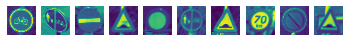

In [38]:
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.imshow(data[i])
    plt.axis('off')
#plt.show()
print('Label: %s' % (labels[10:20],))


## Splitting the dataset

In [40]:
print('Spliting data into training (80%) and test set (20%)... ')
train_n=int(0.8*len(data))
data_train, data_test = np.split(data, [train_n])
train, test = np.split(data, [train_n])
labels_train, labels_test = np.split(labels, [train_n])

Spliting data into training (80%) and test set (20%)... 


In [41]:
len(train)

800

In [42]:
len(test)

200

## Feature Engineering

In [50]:

train_data = []

train_img_count = len(labels_train)

def get_hog(image):
  (H1, hogImage1) = feature.hog(image, orientations = 3,
                                pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                                block_norm  = 'L1' , visualize=True)
  return (H1, hogImage1)


# loop over the images
for i in tqdm(range(0,train_img_count)):
  # Computing the HOG features
  (h_vector, h_image) = get_hog(train[i])
  #append computed HOGs in train data
  train_data.append(h_vector)

train_label = labels_train[0:train_img_count]

## Visualizing HOG 

In [ ]:
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

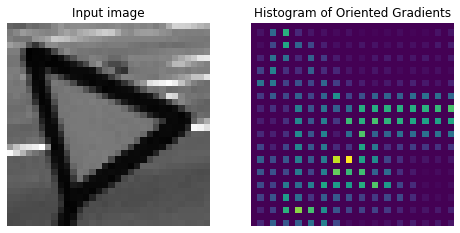

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(train[i], cmap=plt.cm.gray) #i==499
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(h_image, in_range=(0, 255))

ax2.axis('off')
ax2.imshow(hog_image_rescaled)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


# Model training

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',multi_class='auto')



In [53]:
model.fit(train_data, train_label)
print("Logistic Regression training completed")


Logistic Regression training completed


## Getting HOG vectors for test data

In [54]:
from tqdm.notebook import tqdm
test_data = []
test_img_count = len(labels_test)

# loop over the images
for i in tqdm(range(test_img_count)):
   (h_vector, h_image) = get_hog(test[i])

  test_data.append(h_vector)

#get labels
test_labels = labels_test[0:test_img_count]

## Getting predictions

In [55]:
# Create predictions
predicted_labels = model.predict(test_data)
print("Prediction completed")
# uncomment below lines to get the predicted labesl and the actural labels printed.
print("Comparing predicted and actual labels")
print(predicted_labels[0:10])
print(test_labels[0:10])

Prediction completed
Comparing predicted and actual labels
[9 5 2 4 3 7 6 5 3 8]
[9 5 2 4 3 7 6 5 3 8]


# Results

## Confusion Matrix

In [174]:
act = pd.Series(test_labels,name='Actual')
pred = pd.Series(model.predict(test_data),name='Predicted')
confusion_matrix = pd.crosstab(act, pred,margins=True)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted   0   1   2   3   4   5   6   7   8   9  All
Actual                                                
0          23   0   0   0   0   0   0   0   0   0   23
1           0  10   0   0   0   0   0   0   0   0   10
2           0   0  16   0   0   0   0   0   0   0   16
3           0   0   0  24   0   0   0   0   0   0   24
4           0   0   0   0  22   0   0   0   0   0   22
5           0   0   0   0   0  20   0   0   0   0   20
6           0   0   0   0   0   0  23   0   0   0   23
7           0   0   0   0   0   0   0  25   0   0   25
8           0   0   0   0   0   0   0   0  16   0   16
9           0   0   0   0   0   0   0   0   0  21   21
All        23  10  16  24  22  20  23  25  16  21  200


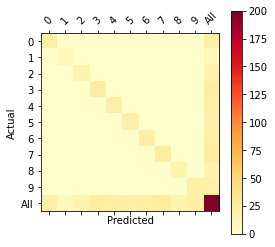

In [175]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.YlOrRd):
  plt.matshow(df_confusion, cmap=cmap) # imshow
  plt.colorbar()
  tick_marks = np.arange(len(df_confusion.columns))
  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  plt.yticks(tick_marks, df_confusion.index)
  plt.ylabel(df_confusion.index.name)
  plt.xlabel(df_confusion.columns.name)
#call function
plot_confusion_matrix(confusion_matrix)

In [58]:
mask = predicted_labels==test_labels
correct = np.count_nonzero(mask)
print (correct*100.0/predicted_labels.size)
result = predicted_labels.astype(int)

100.0


In [195]:
# Classification Report
#I have taken class 10 as 0

In [194]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels, target_names=["0","1","2","3","4","5","6","7","8","9"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Quantitative Result

      Actual Label = 4               Predicted Label = 4


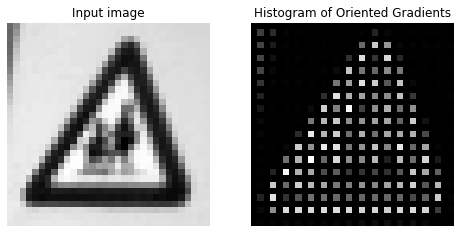

In [192]:
# set index out of 10000 test images
index = 20
#get image
image = test[index]

#compute hog feature vector for above image
(h_vector, h_image) = get_hog(image)
obtained_label = model.predict([h_vector])

#comparison
print("      Actual Label = " + str(test_labels[index])+"               Predicted Label = "+ str(obtained_label[0]))



#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Unsupervised Learning

In [118]:

total_clusters = 10
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

# Fitting Kmeans

In [119]:
# do clustering
kmeans.fit(train_data)
# save results
#loaded_model = pickle.load(open('kmeans', 'rb'))
#result = loaded_model.score(X_test, Y_test
unsup_labels_train= kmeans.labels_

## Getting predictions

In [120]:
# Create predictions
unsup_predicted_labels = kmeans.predict(test_data)
print("Prediction completed")
# uncomment below lines to get the predicted labesl and the actural labels printed.
print("Comparing predicted and actual labels")
print(unsup_predicted_labels[0:10])
print(test_labels[0:10])

Prediction completed
Comparing predicted and actual labels
[9 4 2 1 2 6 7 4 2 3]
[9 5 2 4 3 7 6 5 3 8]


In [121]:
unsup_mask = unsup_predicted_labels==test_labels
unsup_correct = np.count_nonzero(unsup_mask)
print (unsup_correct*100.0/unsup_predicted_labels.size)
unsup_result = unsup_predicted_labels.astype(int)

30.0


## Quantitative Result

### Case 1

      Actual Label = 4               Predicted Label = 1


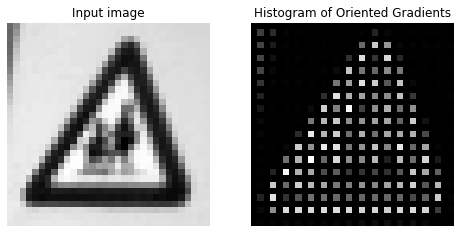

In [203]:
# set index out of 10000 test images
index = 20
#get image
image = test[index]

#compute hog feature vector for above image
(h_vector, h_image) = get_hog(image)
obtained_label = kmeans.predict([h_vector])

#comparison
print("      Actual Label = "+str(test_labels[index])+"               Predicted Label = "+str(obtained_label[0]) )


#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Histogram for label '1' is similar to that of label '4' (predicted above)


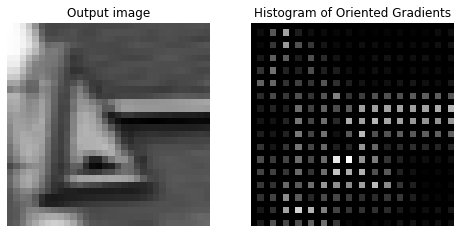

In [204]:
# set index out of 10000 test images
index =46
#get image
image = test[index]

#compute hog feature vector for above image
(h_vector, h_image) = get_hog(image)
obtained_label = kmeans.predict([h_vector])

#comparison
print("Histogram for label '1' is similar to that of label '4' (predicted above)")


#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Output image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### Case 2

Actual Label =
9
Predicted Label =
9


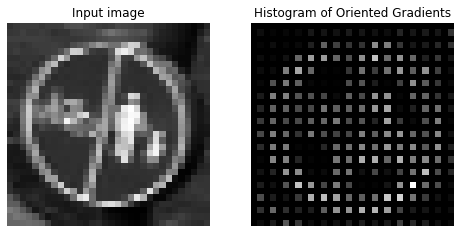

In [125]:
# set index out of 10000 test images
index = 0
#get image
image = test[index]

#compute hog feature vector for above image
(h_vector, h_image) = get_hog(image)
obtained_label = kmeans.predict([h_vector])

#comparison
print("Actual Label =")
print(test_labels[index])
print("Predicted Label =")
print(obtained_label[0])

#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Cluster Visualization

In [146]:
centroids = kmeans.cluster_centers_

In [159]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

In [171]:
# it shows centroids defined are not very distant from each other, 
# as the accuracy shows that unsupervised learning has not performed well

Text(0, 0.5, 'centroids-y')

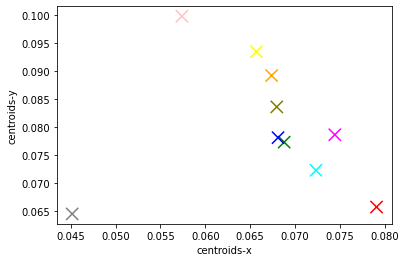

In [205]:
plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c=['green', 'red','blue','orange','yellow','cyan','magenta','grey','olive','pink'])
plt.xlabel("centroids-x")
plt.ylabel("centroids-y")